In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [7]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__3/data2022-05-03-20-59-24.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__10/data2022-05-03-23-12-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__4/data2022-05-03-21-44-08.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__5/data2022-05-03-22-28-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__1/data2022-05-03-19-19-22.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__2/

In [8]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,-2.617994,0.000,4.436280,0.639546,-2.410262,-1.378531,3.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
1,-2.617994,2.068,4.435846,0.502125,-2.410262,-1.378531,3.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
2,-2.617994,4.136,4.439133,0.285201,-2.410262,-1.378531,3.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
3,-2.617994,6.204,4.444510,0.315714,-2.410262,-1.378531,3.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
4,-2.617994,8.272,4.457329,0.638725,-2.410262,-1.378531,3.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-2.094395,144.760,5.293559,0.019295,-1.298957,-2.241104,2.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-120.0,10.34
71,-2.094395,146.828,5.299733,0.018964,-1.298957,-2.241104,2.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-120.0,10.34
72,-2.094395,148.896,5.305882,0.018131,-1.298957,-2.241104,2.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-120.0,10.34
73,-2.094395,150.964,5.312024,0.018703,-1.298957,-2.241104,2.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-120.0,10.34


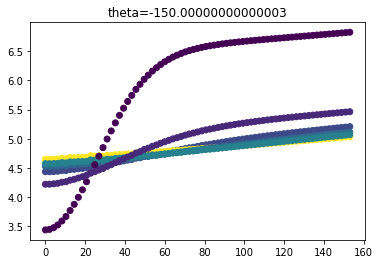

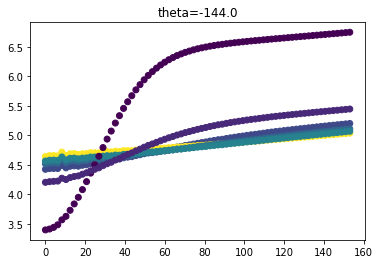

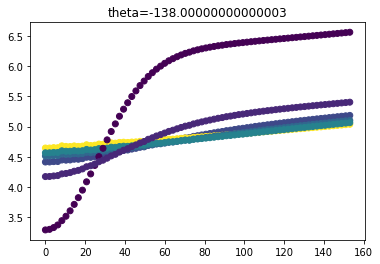

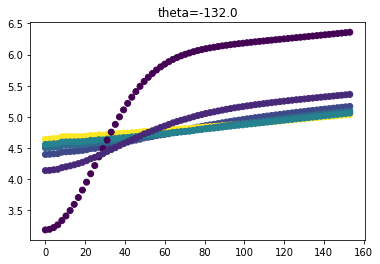

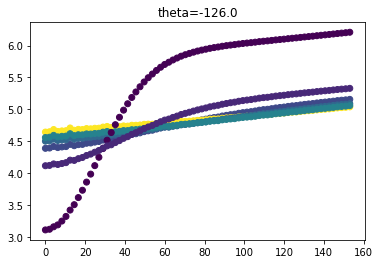

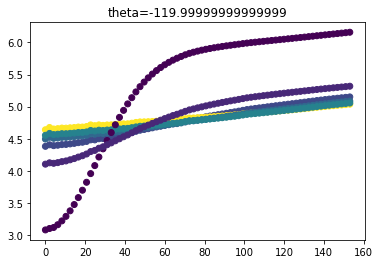

[ 3. 10.  4.  5.  1.  2.]


In [9]:
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     plt.title('theta='+str(th*180/np.pi))
    
# print(tss)

thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'],df2['SE'], c=df2['T'] )
    plt.title('theta='+str(th*180/np.pi))
    plt.show()
    
print(tss)

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


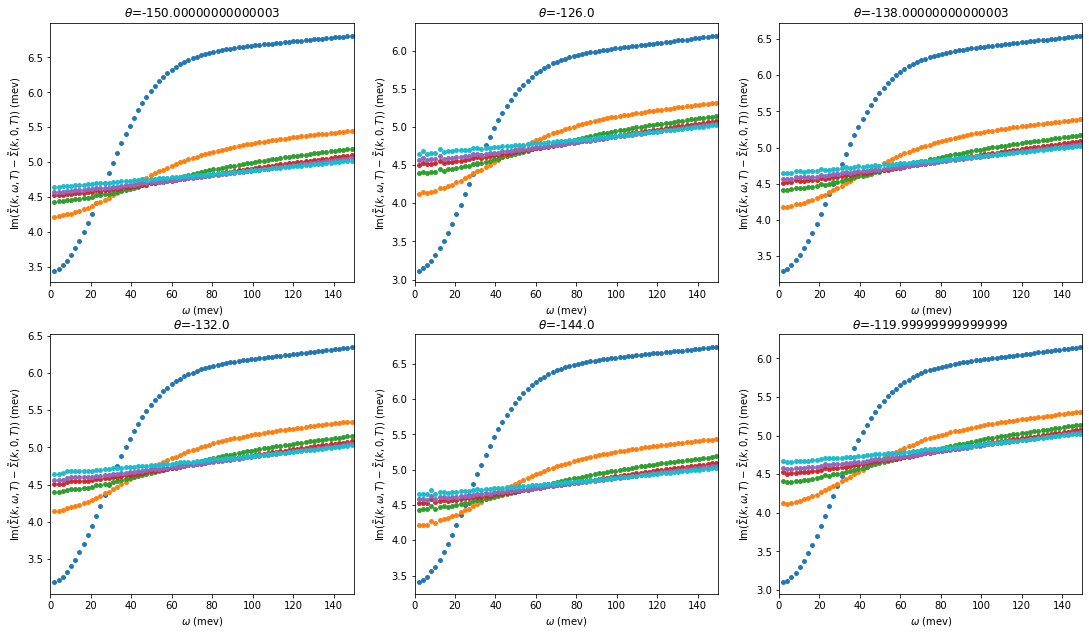

In [10]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for T in [1.0,2.0,3.0,4.0, 5.0,6.0,7.0, 8.0,9.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

-150.00000000000003
0 0 0


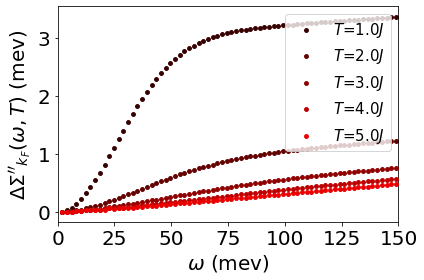

In [11]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,4.0,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']
        
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T)+r"$J$",s=15, color=cm.hot(T/15), zorder=T)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()
plt.savefig("imgs/pap_fig1e", dpi=400)

[-2.199114857512855]
0 0 0


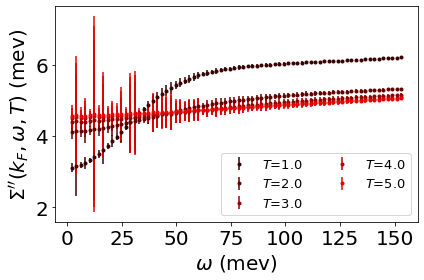

In [12]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[4]]
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0, 4.0 ,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
        
            
        err=df3['error']
        axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15))
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Sigma''(k_F,\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 13}, loc=4, ncol=2)
    plt.tight_layout()
# plt.savefig("imgs/fig2c")

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


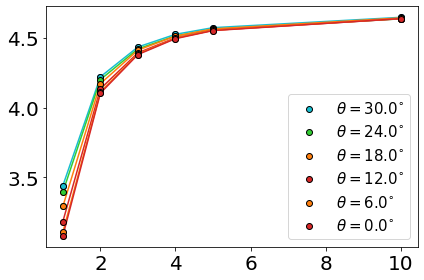

In [13]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red','tab:orange','tab:red']

for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    plot(df2['T'],df2['SE'],c=listcol[l], zorder=0)
    scatter(df2['T'],df2['SE'], edgecolor='k', label=r"$\theta =$"+str(-round(th*180/np.pi,1)-120)+r"$^{\circ}$", zorder=2, c=listcol[l])
    plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.savefig("imgs/pap_fig1b")
plt.tight_layout()    
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


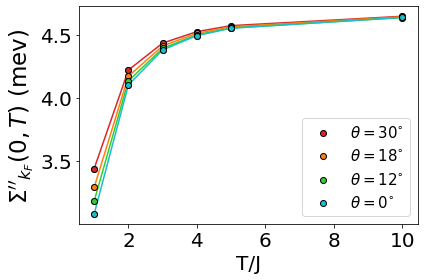

In [14]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    plot(df2['T'],df2['SE'],c=listcol[l], zorder=0)
    scatter(df2['T'],df2['SE'], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$ (mev)", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

-150.00000000000003
0 0 0
1 0 0
2 0 0
3 0 0
4 0 0
5 0 0


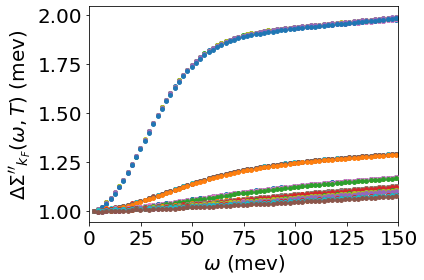

In [15]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
# thets=[df['theta'].unique()[0]]
thets=df['theta'].unique()
Temps=df['T'].unique()
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in Temps:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']/df3.iloc[1]['SE']
        
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T)+r"$J$",s=15,  zorder=T)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    # axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()

In [16]:
def func(x, a, b):
    
    return a * x*x +b

-150.00000000000003
0 0 0


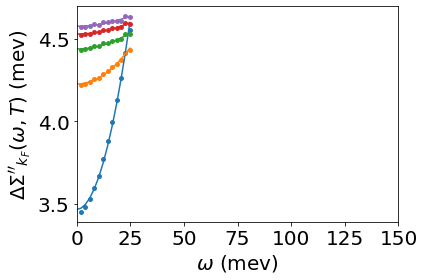

In [25]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
# thets=[df['theta'].unique()[0]]
thets=[df['theta'].unique()[0]]
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])
shift=[]
scale=[]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,4.0,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        indmax=13
        x=df3['freq'][:indmax]
        y=df3['SE'][:indmax]
        
        popt, pcov = curve_fit(func, x, y)
        plt.plot(x,func(x, popt[0], popt[1]))
        shift.append(popt[1])
        scale.append(popt[0])
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T)+r"$J$",s=15,  zorder=T)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
        
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    # axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()

In [26]:
xilist=[0.7977001437529434, 0.44769799421336715, 0.3385934132942712, 0.2820654445433112, 0.24641327783634667, 0.22140855357460135, 0.20266334949870196, 0.18795373910710966, 0.17602044681425916, 0.16609148193650858]
xilist_t=np.array([xilist[0],xilist[1],xilist[2],xilist[3],xilist[4]])

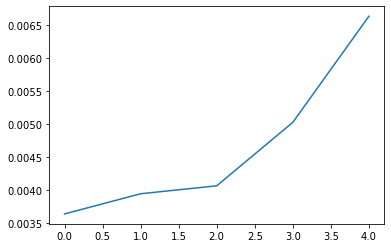

In [27]:
plot(np.array(scale)/((xilist_t)**3))

-150.00000000000003
0 0 0
1 0 0
2 0 0
3 0 0
4 0 0
5 0 0


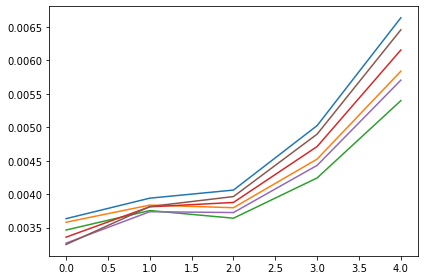

In [29]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
# thets=[df['theta'].unique()[0]]
thets=df['theta'].unique()
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])

for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    shift=[]
    scale=[]
    for T in [1.0,2.0,3.0,4.0,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        indmax=13
        x=df3['freq'][:indmax]
        y=df3['SE'][:indmax]
        
        popt, pcov = curve_fit(func, x, y)
        # plt.plot(x,func(x, popt[0], popt[1]))
        shift.append(popt[1])
        scale.append(popt[0])
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        # axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T)+r"$J$",s=15,  zorder=T)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    plot(np.array(scale)/((xilist_t)**3))
    # plot(np.array(shift)/((xilist_t)))
    
    
    # # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    # axis.set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T)$ (mev)", size=20)
    # axis.set_xlabel(r"$\omega$ (mev)", size=20)
    # axis.set_xlim([0,150])
    # plt.xticks(size=20)
    # plt.yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=5)
    # pyplot.locator_params(axis='x', nbins=7)
    # # axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()

-150.00000000000003
0 0 0
1 0 0
2 0 0
3 0 0
4 0 0
5 0 0


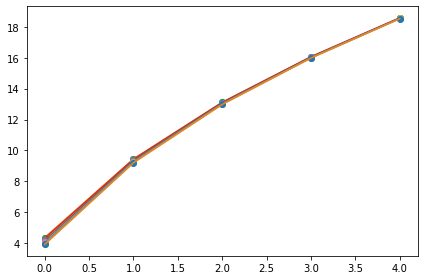

In [31]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
# thets=[df['theta'].unique()[0]]
thets=df['theta'].unique()
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])

for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    shift=[]
    scale=[]
    for T in [1.0,2.0,3.0,4.0,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        indmax=13
        x=df3['freq'][:indmax]
        y=df3['SE'][:indmax]
        
        popt, pcov = curve_fit(func, x, y)
        # plt.plot(x,func(x, popt[0], popt[1]))
        shift.append(popt[1])
        scale.append(popt[0])
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        # axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T)+r"$J$",s=15,  zorder=T)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    # plot(np.array(scale)/((xilist_t)**3))
    plot(np.array(shift)/((xilist_t)),'o')
    plot(np.array(shift)/((xilist_t)))
    
    
    # # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    # axis.set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T)$ (mev)", size=20)
    # axis.set_xlabel(r"$\omega$ (mev)", size=20)
    # axis.set_xlim([0,150])
    # plt.xticks(size=20)
    # plt.yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=5)
    # pyplot.locator_params(axis='x', nbins=7)
    # # axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()

-150.00000000000003
0 0 0
1 0 0
2 0 0
3 0 0
4 0 0
5 0 0


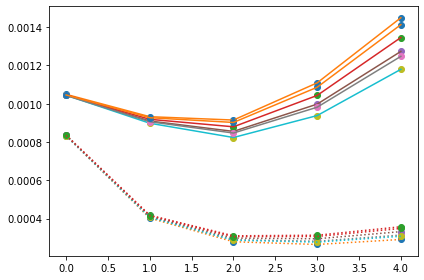

In [33]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
# thets=[df['theta'].unique()[0]]
thets=df['theta'].unique()
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])

for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    shift=[]
    scale=[]
    for T in [1.0,2.0,3.0,4.0,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        indmax=13
        x=df3['freq'][:indmax]
        y=df3['SE'][:indmax]
        
        popt, pcov = curve_fit(func, x, y)
        # plt.plot(x,func(x, popt[0], popt[1]))
        shift.append(popt[1])
        scale.append(popt[0])
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        # axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T)+r"$J$",s=15,  zorder=T)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    plot((np.array(scale)/np.array(shift))/((xilist_t)**3),'o')
    plot((np.array(scale)/np.array(shift))/((xilist_t)**3))
    plot((np.array(scale)/np.array(shift))/((xilist_t)**2),'o')
    plot((np.array(scale)/np.array(shift))/((xilist_t)**2),ls=':')
    # scatter((np.array(scale)/np.array(shift))/((xilist_t)**2))
    # plot(np.array(shift)/((xilist_t)))
    
    
    # # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    # axis.set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T)$ (mev)", size=20)
    # axis.set_xlabel(r"$\omega$ (mev)", size=20)
    # axis.set_xlim([0,150])
    # plt.xticks(size=20)
    # plt.yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=5)
    # pyplot.locator_params(axis='x', nbins=7)
    # # axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()